In [17]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# from natsort import natsorted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import shap
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.transform import Rotation as R

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.signal import correlate
from scipy.fft import fft
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import entropy


In [19]:
data_train_file_1   = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_1.csv')
data_train_file_4   = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_4.csv')

data_test_file_2    = pd.read_csv('/content/drive/My Drive/OpenPack dataset S1/Data/Gen_data/File_2.csv')



In [20]:
data_train = pd.concat([data_train_file_1, data_train_file_4], ignore_index=True)

In [21]:
data_train = data_train.drop(['Unnamed: 0', 'action'], axis = 1)
data_train['operation'] = data_train['operation'].astype('category')

data_test_file_2 = data_test_file_2.drop(['Unnamed: 0', 'action'], axis = 1)
data_test_file_2['operation'] = data_test_file_2['operation'].astype('category')



In [22]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148433 entries, 0 to 148432
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   atr01/acc_x   148433 non-null  float64 
 1   atr01/acc_y   148433 non-null  float64 
 2   atr01/acc_z   148433 non-null  float64 
 3   atr01/gyro_x  148433 non-null  float64 
 4   atr01/gyro_y  148433 non-null  float64 
 5   atr01/gyro_z  148433 non-null  float64 
 6   atr01/quat_w  148433 non-null  float64 
 7   atr01/quat_x  148433 non-null  float64 
 8   atr01/quat_y  148433 non-null  float64 
 9   atr01/quat_z  148433 non-null  float64 
 10  atr02/acc_x   148433 non-null  float64 
 11  atr02/acc_y   148433 non-null  float64 
 12  atr02/acc_z   148433 non-null  float64 
 13  atr02/gyro_x  148433 non-null  float64 
 14  atr02/gyro_y  148433 non-null  float64 
 15  atr02/gyro_z  148433 non-null  float64 
 16  atr02/quat_w  148433 non-null  float64 
 17  atr02/quat_x  148433 non-null

In [23]:
# c()

In [24]:

# def angle_from_quaternion(data, wrist, upper):
#   q_wrist = np.array([
#     data[f"atr0{wrist}/quat_x"],
#     data[f"atr0{wrist}/quat_y"],
#     data[f"atr0{wrist}/quat_z"],
#     data[f"atr0{wrist}/quat_w"]
#   ])
#   q_upper = np.array([
#     data[f"atr0{upper}/quat_x"],
#     data[f"atr0{upper}/quat_y"],
#     data[f"atr0{upper}/quat_z"],
#     data[f"atr0{upper}/quat_w"]
#   ])
#   R_upper = R.from_quat(q_upper)
#   R_wrist = R.from_quat(q_wrist)
#   R_rel = R_upper.inv() * R_wrist
#   return R_rel.magnitude()

# def quat_deviation(q_current, q_ref):
#   R_current = R.from_quat(q_current)
#   R_ref = R.from_quat(q_ref)
#   R_diff = R_ref.inv() * R_current
#   return R_diff.magnitude()

# def compute_angular_acceleration(gyro: np.ndarray) -> np.ndarray:
#   dt = 1.0 / 30
#   return np.gradient(gyro, axis=0) / dt

# def compute_jerk(acc: np.ndarray) -> np.ndarray:
#   dt = 1.0 / 30
#   return np.gradient(acc, axis=0) / dt

# def integrate_velocity(acc: np.ndarray) -> np.ndarray:
#   dt = 1.0 / 30
#   velocity = np.cumsum(acc * dt, axis=0)
#   return velocity

# def feature_extract(data):
#   # Mag for acc, gyro, quat
#   for i in range(1,5):
#     acc_x, acc_y, acc_z = f'atr0{i}/acc_x', f'atr0{i}/acc_y', f'atr0{i}/acc_z'
#     gyro_x, gyro_y, gyro_z = f'atr0{i}/gyro_x', f'atr0{i}/gyro_y', f'atr0{i}/gyro_z'
#     quat_w, quat_x, quat_y, quat_z = f'atr0{i}/quat_w', f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z'

#     data[f'atr0{i}/acc_mag']          = np.sqrt(data[acc_x]**2  + data[acc_y]**2  + data[acc_z]**2)
#     data[f'atr0{i}/acc_mag_xy']       = np.sqrt(data[acc_x]**2  + data[acc_y]**2)
#     data[f'atr0{i}/gyro_mag']         = np.sqrt(data[gyro_x]**2 + data[gyro_y]**2 + data[gyro_z]**2)
#     data[f'atr0{i}/quat_mag']         = np.sqrt(data[quat_w]**2 + data[quat_x]**2 + data[quat_y]**2 + data[quat_z]**2)


#   # Diff mag
#   data['acc_mag_diff_01_02']          = (data['atr01/acc_mag'] - data['atr02/acc_mag']).abs()
#   data['acc_mag_diff_03_04']          = (data['atr03/acc_mag'] - data['atr04/acc_mag']).abs()
#   data['acc_mag_diff_01_03']          = (data['atr01/acc_mag'] - data['atr03/acc_mag']).abs()
#   data['acc_mag_diff_02_04']          = (data['atr02/acc_mag'] - data['atr04/acc_mag']).abs()


#   # Angle
#   data["Right_angle_radian"]          = data.apply(lambda row: angle_from_quaternion(row, wrist=1, upper=3), axis=1)
#   data["Left_angle_radian"]           = data.apply(lambda row: angle_from_quaternion(row, wrist=2, upper=4), axis=1)


#   # Euler
#   for i in range(1,5):
#     q = data[[f'atr0{i}/quat_w', f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z']].values
#     euler = R.from_quat(q).as_euler('xyz', degrees=True)
#     data[f'atr0{i}/roll'] = euler[:, 0]
#     data[f'atr0{i}/pitch'] = euler[:, 1]
#     data[f'atr0{i}/yaw'] = euler[:, 2]


#     # Độ lệch quaternion so với trạng thái nghỉ
#   for i in range(1,5):
#     q_ref = data[[f'atr0{i}/quat_w', f'atr0{i}/quat_x', f'atr0{i}/quat_y', f'atr0{i}/quat_z']].iloc[0].values
#     data[f'atr0{i}/quat_deviation'] = data.apply(lambda row: quat_deviation( [row[f'atr0{i}/quat_w'], row[f'atr0{i}/quat_x'], row[f'atr0{i}/quat_y'], row[f'atr0{i}/quat_z']], q_ref ), axis=1)


#   # Tính Angular Acceleration (gia tốc góc)
#   for i in range(1, 3):
#     gyro_cols = [f'atr0{i}/gyro_x', f'atr0{i}/gyro_y', f'atr0{i}/gyro_z']
#     gyro_data = data[gyro_cols].to_numpy()
#     ang_acc = compute_angular_acceleration(gyro_data)
#     data[f'atr0{i}/ang_acc_x'] = ang_acc[:, 0]
#     data[f'atr0{i}/ang_acc_y'] = ang_acc[:, 1]
#     data[f'atr0{i}/ang_acc_z'] = ang_acc[:, 2]
#     data[f'atr0{i}/ang_acc_mag'] = np.linalg.norm(ang_acc, axis=1)

#   # Tính Jerk
#   for i in range(1,3):
#     acc_cols = [f'atr0{i}/acc_x', f'atr0{i}/acc_y', f'atr0{i}/acc_z']
#     acc_data = data[acc_cols].to_numpy()
#     jerk = compute_jerk(acc_data)
#     data[f'atr0{i}/jerk_x'] = jerk[:, 0]
#     data[f'atr0{i}/jerk_y'] = jerk[:, 1]
#     data[f'atr0{i}/jerk_z'] = jerk[:, 2]
#     data[f'atr0{i}/jerk_mag'] = np.linalg.norm(jerk, axis=1)

#   # Tính Linear Velocity (vận tốc tuyến tính)
#   for i in range(3,5):
#     acc_cols = [f'atr0{i}/acc_x', f'atr0{i}/acc_y', f'atr0{i}/acc_z']
#     acc_data = data[acc_cols].to_numpy()
#     vel = integrate_velocity(acc_data)
#     data['atr01/vel_x'] = vel[:, 0]
#     data['atr01/vel_y'] = vel[:, 1]
#     data['atr01/vel_z'] = vel[:, 2]
#     data['atr01/vel_mag'] = np.linalg.norm(vel, axis=1)



#   return data

In [25]:

def angle_from_quaternion(q_upper, q_wrist):
  """Tính góc quay tương đối giữa hai khớp dùng quaternion (vectorized)"""
  R_upper = R.from_quat(q_upper)
  R_wrist = R.from_quat(q_wrist)
  R_rel = R_upper.inv() * R_wrist
  return R_rel.magnitude()

def quat_deviation(q_current, q_ref):
  """Tính độ lệch quaternion so với tham chiếu (vectorized)"""
  R_current = R.from_quat(q_current)
  R_ref = R.from_quat(q_ref)
  R_diff = R_ref.inv() * R_current
  return R_diff.magnitude()

def compute_angular_acceleration(gyro: np.ndarray, dt: float = 1/30) -> np.ndarray:
  """Tính gia tốc góc từ dữ liệu con quay"""
  return np.gradient(gyro, axis=0) / dt

def compute_jerk(acc: np.ndarray, dt: float = 1/30) -> np.ndarray:
  """Tính jerk từ dữ liệu gia tốc"""
  return np.gradient(acc, axis=0) / dt

def integrate_velocity(acc: np.ndarray, dt: float = 1/30) -> np.ndarray:
  """Tích phân gia tốc -> vận tốc với drift compensation đơn giản"""
  velocity = np.cumsum(acc * dt, axis=0)
  velocity -= np.mean(velocity, axis=0)  # Giảm drift
  return velocity

def feature_extract(data):
  # ===================================================================
  # 1. Tính độ lớn (magnitude) cho các tín hiệu
  # ===================================================================
  for i in range(1, 5):
    prefix = f'atr0{i}'

    # Magnitude calculations
    data[f'{prefix}/acc_mag'] = np.linalg.norm(data[[f'{prefix}/acc_x', f'{prefix}/acc_y', f'{prefix}/acc_z']], axis=1)
    data[f'{prefix}/acc_mag_xy'] = np.linalg.norm(data[[f'{prefix}/acc_x', f'{prefix}/acc_y']], axis=1)
    data[f'{prefix}/gyro_mag'] = np.linalg.norm(data[[f'{prefix}/gyro_x', f'{prefix}/gyro_y', f'{prefix}/gyro_z']], axis=1)
    data[f'{prefix}/quat_mag'] = np.linalg.norm(data[[f'{prefix}/quat_w', f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z']], axis=1)

  # ===================================================================
  # 2. Tính toán chênh lệch giữa các sensor
  # ===================================================================
  data['acc_mag_diff_01_02'] = (data['atr01/acc_mag'] - data['atr02/acc_mag']).abs()
  data['acc_mag_diff_03_04'] = (data['atr03/acc_mag'] - data['atr04/acc_mag']).abs()
  data['acc_mag_diff_01_03'] = (data['atr01/acc_mag'] - data['atr03/acc_mag']).abs()
  data['acc_mag_diff_02_04'] = (data['atr02/acc_mag'] - data['atr04/acc_mag']).abs()

  # ===================================================================
  # 3. Tính góc khớp tương đối (Vectorized)
  # ===================================================================
  # Right arm (sensor 1 vs 3)
  q_upper_right = data[['atr03/quat_x', 'atr03/quat_y', 'atr03/quat_z', 'atr03/quat_w']].values
  q_wrist_right = data[['atr01/quat_x', 'atr01/quat_y', 'atr01/quat_z', 'atr01/quat_w']].values
  data["Right_angle_radian"] = angle_from_quaternion(q_upper_right, q_wrist_right)

  # Left arm (sensor 2 vs 4)
  q_upper_left = data[['atr04/quat_x', 'atr04/quat_y', 'atr04/quat_z', 'atr04/quat_w']].values
  q_wrist_left = data[['atr02/quat_x', 'atr02/quat_y', 'atr02/quat_z', 'atr02/quat_w']].values
  data["Left_angle_radian"] = angle_from_quaternion(q_upper_left, q_wrist_left)

  # ===================================================================
  # 4. Chuyển đổi Euler angles (Vectorized)
  # ===================================================================
  for i in range(1, 5):
    prefix = f'atr0{i}'
    q = data[[f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z', f'{prefix}/quat_w']].values
    euler = R.from_quat(q).as_euler('xyz', degrees=True)
    data[f'{prefix}/roll'] = euler[:, 0]
    data[f'{prefix}/pitch'] = euler[:, 1]
    data[f'{prefix}/yaw'] = euler[:, 2]

  # ===================================================================
  # 5. Tính độ lệch quaternion (Vectorized)
  # ===================================================================
  for i in range(1, 5):
    prefix = f'atr0{i}'
    q_ref = data[[f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z', f'{prefix}/quat_w']].iloc[0].values
    q_current = data[[f'{prefix}/quat_x', f'{prefix}/quat_y', f'{prefix}/quat_z', f'{prefix}/quat_w']].values
    data[f'{prefix}/quat_deviation'] = quat_deviation(q_current, q_ref)

  # ===================================================================
  # 6. Tính toán động học (Angular acceleration, Jerk, Velocity)
  # ===================================================================
  # Angular acceleration cho cổ tay (sensor 1,2)
  for i in range(1, 3):
    prefix = f'atr0{i}'
    gyro_data = data[[f'{prefix}/gyro_x', f'{prefix}/gyro_y', f'{prefix}/gyro_z']].values
    ang_acc = compute_angular_acceleration(gyro_data)
    data[f'{prefix}/ang_acc_x'] = ang_acc[:, 0]
    data[f'{prefix}/ang_acc_y'] = ang_acc[:, 1]
    data[f'{prefix}/ang_acc_z'] = ang_acc[:, 2]
    data[f'{prefix}/ang_acc_mag'] = np.linalg.norm(ang_acc, axis=1)

  # Jerk cho cổ tay (sensor 1,2)
  for i in range(1, 3):
    prefix = f'atr0{i}'
    acc_data = data[[f'{prefix}/acc_x', f'{prefix}/acc_y', f'{prefix}/acc_z']].values
    jerk = compute_jerk(acc_data)
    data[f'{prefix}/jerk_x'] = jerk[:, 0]
    data[f'{prefix}/jerk_y'] = jerk[:, 1]
    data[f'{prefix}/jerk_z'] = jerk[:, 2]
    data[f'{prefix}/jerk_mag'] = np.linalg.norm(jerk, axis=1)

  # Velocity cho cánh tay trên (sensor 3,4)
  for i in range(3, 5):
    prefix = f'atr0{i}'
    acc_data = data[[f'{prefix}/acc_x', f'{prefix}/acc_y', f'{prefix}/acc_z']].values
    vel = integrate_velocity(acc_data)
    data[f'{prefix}/vel_x'] = vel[:, 0]
    data[f'{prefix}/vel_y'] = vel[:, 1]
    data[f'{prefix}/vel_z'] = vel[:, 2]
    data[f'{prefix}/vel_mag'] = np.linalg.norm(vel, axis=1)

  return data

In [10]:
data_test_file_2 = feature_extract(data_test_file_2)
data_train       = feature_extract(data_train)

In [11]:
# data_test_file_2.info()

In [12]:
data_test_file_2.head()

,atr01/acc_x,atr01/acc_y,atr01/acc_z,atr01/gyro_x,atr01/gyro_y,atr01/gyro_z,atr01/quat_w,atr01/quat_x,atr01/quat_y,atr01/quat_z,...,atr02/jerk_z,atr02/jerk_mag,atr03/vel_x,atr03/vel_y,atr03/vel_z,atr03/vel_mag,atr04/vel_x,atr04/vel_y,atr04/vel_z,atr04/vel_mag
0,0.9647,0.0055,0.0044,-120.60,-12.02,7.56,0.639640,0.307427,-0.634987,0.305190,...,1.6260,4.121076,-532.559728,-843.666269,-32.896025,998.235837,-221.187836,963.646744,-164.145157,1002.238863
1,0.7069,0.0016,0.2686,86.19,54.18,45.61,-0.519414,0.332219,-0.464453,-0.635707,...,-1.5195,2.564543,-532.543278,-843.640032,-32.901695,998.205074,-221.180326,963.610951,-164.137204,1002.201488
2,0.9742,-0.0344,-0.1432,-120.29,-6.34,10.69,-0.271750,0.620001,-0.139708,-0.722657,...,0.0885,2.896440,-532.526291,-843.613162,-32.901978,998.173311,-221.179122,963.574101,-164.129414,1002.164516
3,0.8602,0.1683,-0.2760,19.42,15.88,-21.82,-0.366613,0.614582,-0.155199,-0.681026,...,3.7980,3.827588,-532.518898,-843.585339,-32.896071,998.145657,-221.176072,963.547748,-164.118297,1002.136684
4,0.8233,0.2677,-0.0777,-13.04,-3.75,6.89,-0.318778,0.635512,-0.122766,-0.692411,...,2.6760,5.771613,-532.509781,-843.558662,-32.894481,998.118195,-221.171092,963.522054,-164.115937,1002.110494


In [13]:
print("Kích thước dữ liệu train:", data_train.shape)
print("Kích thước dữ liệu test:", data_test_file_2.shape)

data_train.dropna(inplace=True)
data_test_file_2.dropna(inplace=True)


print("Kích thước dữ liệu train:", data_train.shape)
print("Kích thước dữ liệu test:", data_test_file_2.shape)

Kích thước dữ liệu train: (148433, 103)
Kích thước dữ liệu test: (64787, 103)
Kích thước dữ liệu train: (148433, 103)
Kích thước dữ liệu test: (64787, 103)


In [14]:
target = "operation"

X_train = data_train.drop(target, axis=1)
y_train = data_train[target]

X_test = data_test_file_2.drop(target, axis=1)
y_test = data_test_file_2[target]

In [15]:

# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Trước SMOTE:", pd.Series(y_train_encoded).value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Sau SMOTE:", pd.Series(y_train_resampled).value_counts())

print("Nhãn trong y_train_resampled:", np.unique(y_train_resampled))
print("Nhãn trong y_test_encoded:", np.unique(y_test_encoded))


Trước SMOTE: 2     22720
0     20842
1     20038
6     17815
3     17735
4     12759
7      9567
9      9052
5      6181
10     6008
8      5716
Name: count, dtype: int64
Sau SMOTE: 0     22720
1     22720
2     22720
10    22720
3     22720
4     22720
5     22720
6     22720
7     22720
8     22720
9     22720
Name: count, dtype: int64
Nhãn trong y_train_resampled: [ 0  1  2  3  4  5  6  7  8  9 10]
Nhãn trong y_test_encoded: [ 0  1  2  3  4  5  6  7  8  9 10]



🔍 Đang huấn luyện mô hình: Random Forest
              precision    recall  f1-score   support

         100       0.37      0.58      0.45      6526
         200       0.51      0.33      0.40     10660
         300       0.47      0.35      0.40      9221
         400       0.40      0.64      0.49      6429
         500       0.37      0.20      0.26      4943
         600       0.34      0.34      0.34      2585
         700       0.65      0.71      0.68     10140
         800       0.40      0.39      0.40      4466
         900       0.34      0.56      0.42      3776
        1000       0.47      0.11      0.18      4872
        8100       0.04      0.08      0.05      1169

    accuracy                           0.43     64787
   macro avg       0.40      0.39      0.37     64787
weighted avg       0.46      0.43      0.42     64787



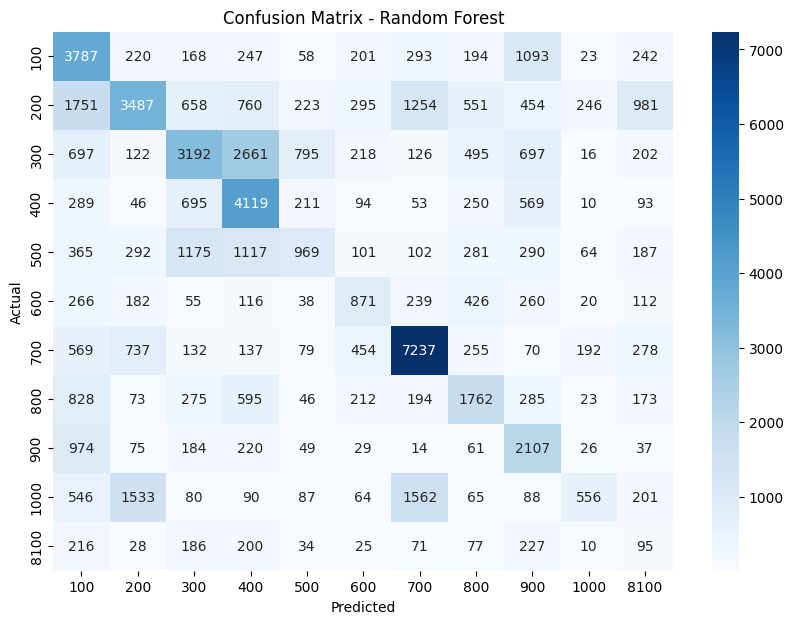


🔍 Đang huấn luyện mô hình: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

              precision    recall  f1-score   support

         100       0.00      0.00      0.00      6526
         200       0.00      0.00      0.00     10660
         300       0.45      0.12      0.19      9221
         400       0.13      0.14      0.14      6429
         500       0.06      0.00      0.00      4943
         600       0.02      0.00      0.00      2585
         700       0.00      0.00      0.00     10140
         800       0.51      0.00      0.01      4466
         900       0.09      0.09      0.09      3776
        1000       0.09      0.46      0.15      4872
        8100       0.02      0.38      0.03      1169

    accuracy                           0.08     64787
   macro avg       0.12      0.11      0.06     64787
weighted avg       0.13      0.08      0.06     64787



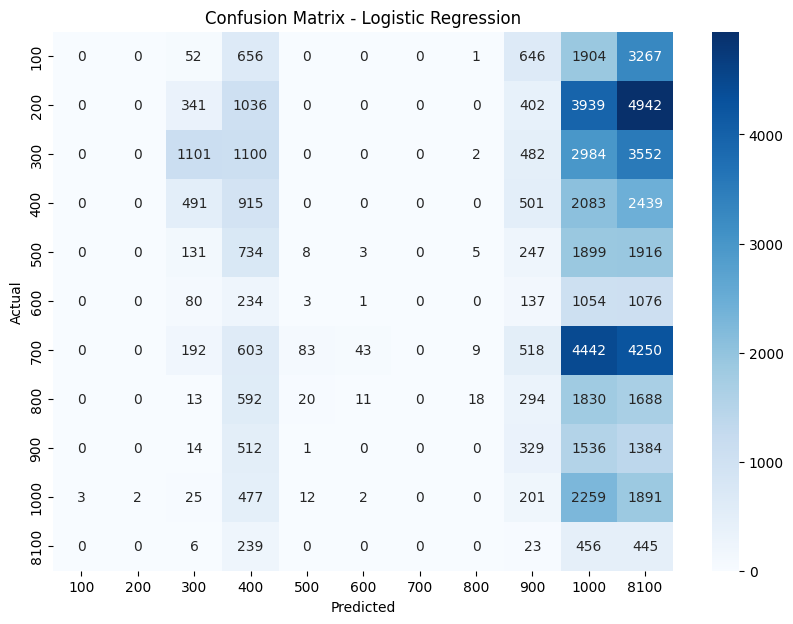


🔍 Đang huấn luyện mô hình: Extra Trees
              precision    recall  f1-score   support

         100       0.36      0.53      0.43      6526
         200       0.45      0.35      0.40     10660
         300       0.46      0.39      0.42      9221
         400       0.41      0.62      0.49      6429
         500       0.36      0.13      0.19      4943
         600       0.29      0.29      0.29      2585
         700       0.67      0.67      0.67     10140
         800       0.38      0.37      0.37      4466
         900       0.32      0.53      0.40      3776
        1000       0.49      0.13      0.21      4872
        8100       0.03      0.08      0.05      1169

    accuracy                           0.42     64787
   macro avg       0.38      0.37      0.36     64787
weighted avg       0.44      0.42      0.41     64787



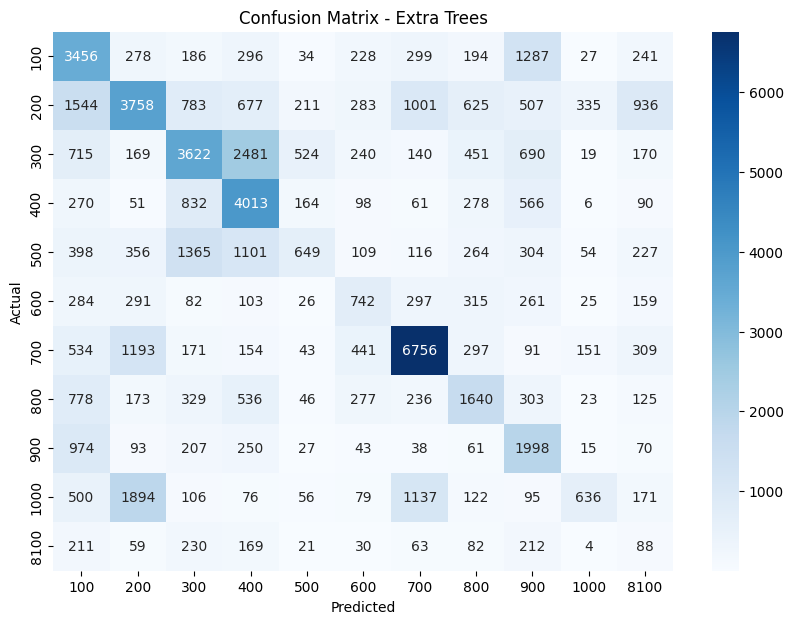


🔍 Đang huấn luyện mô hình: KNN (K-Nearest Neighbors)
              precision    recall  f1-score   support

         100       0.22      0.25      0.23      6526
         200       0.22      0.16      0.19     10660
         300       0.22      0.10      0.14      9221
         400       0.29      0.20      0.24      6429
         500       0.11      0.12      0.12      4943
         600       0.06      0.14      0.08      2585
         700       0.37      0.24      0.29     10140
         800       0.11      0.14      0.12      4466
         900       0.12      0.15      0.13      3776
        1000       0.18      0.27      0.22      4872
        8100       0.02      0.09      0.03      1169

    accuracy                           0.18     64787
   macro avg       0.18      0.17      0.16     64787
weighted avg       0.22      0.18      0.19     64787



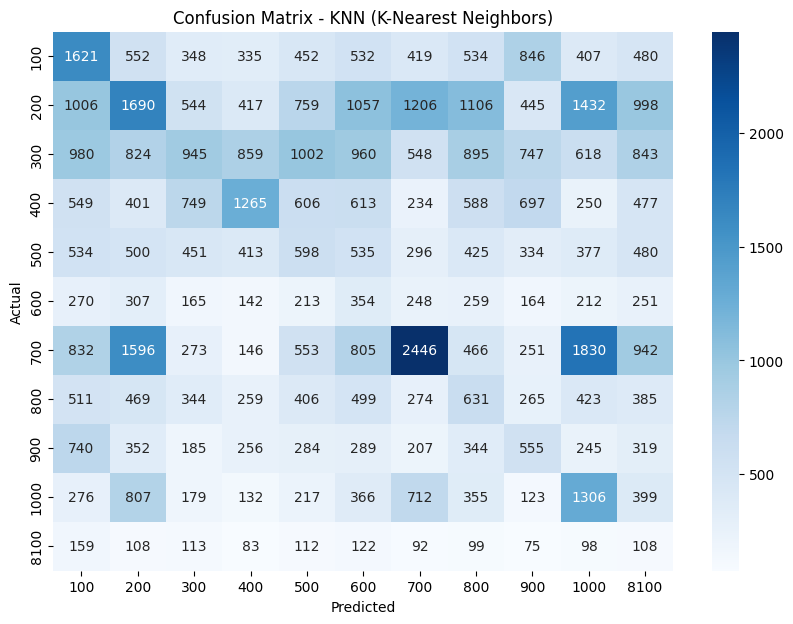


🔍 Đang huấn luyện mô hình: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:28:18] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:28:18] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         100       0.19      0.24      0.21      6526
         200       0.27      0.39      0.32     10660
         300       0.50      0.22      0.31      9221
         400       0.42      0.42      0.42      6429
         500       0.39      0.14      0.21      4943
         600       0.15      0.20      0.17      2585
         700       0.61      0.43      0.50     10140
         800       0.29      0.46      0.36      4466
         900       0.34      0.48      0.40      3776
        1000       0.37      0.20      0.26      4872
        8100       0.02      0.05      0.03      1169

    accuracy                           0.32     64787
   macro avg       0.32      0.29      0.29     64787
weighted avg       0.37      0.32      0.33     64787



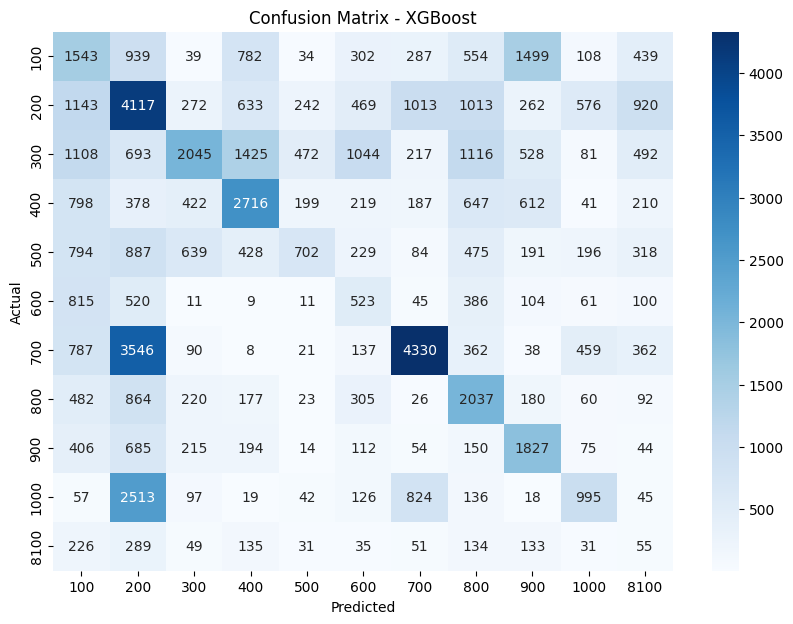


🔍 Đang huấn luyện mô hình: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.340846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25850
[LightGBM] [Info] Number of data points in the train set: 249920, number of used features: 102
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -2.397895
              precision    recall  f1-score   support

         100       0.3

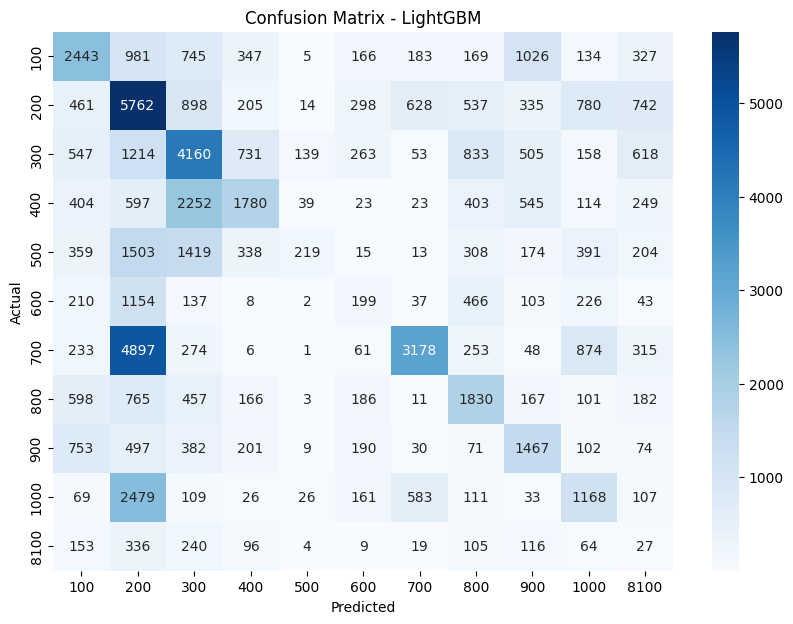

In [16]:
# Các model sẽ thử nghiệm
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "KNN (K-Nearest Neighbors)": KNeighborsClassifier(n_neighbors=7),
    "XGBoost": XGBClassifier
     (
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        tree_method='hist',
        device='cuda'
    ),
    "LightGBM": LGBMClassifier
     (
        n_estimators=200,
        learning_rate=0.1
      )
}

# Huấn luyện và đánh giá từng model
for model_name, model in models.items():
    print(f"\n🔍 Đang huấn luyện mô hình: {model_name}")
    model.fit(X_train_resampled, y_train_resampled)

    y_pred_encoded = model.predict(X_test)

    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_test_original = label_encoder.inverse_transform(y_test_encoded)

    print(classification_report(y_test_original, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test_original, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()